In [57]:
#pip install tensorflow

In [1]:
#Data
import numpy as np
import pandas as pd

#Charts and visulaization
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objects as go

#NNs
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [10]:
import glob
import pandas as pd

# Set the path to the folder containing the CSV files
data = r"C:\Users\guilherme.salvador\OneDrive - 501101365 - Rangel Invest SA\XLS_rangel_files\Job_table_info.xls"
data = pd.read_excel(data)

In [4]:
data.head

<bound method NDFrame.head of              jobno                                           custname  \
0     MPMNJ2301245             MOTA-ENGIL ENG. CONS. AFR, SA-SUC-MOÇA   
1     OPOAE2300554  MOTA-ENGIL - ENGENHARIA E CONSTRUÇÃO ÁFRICA, S.A.   
2     OPOAE2300552  MOTA-ENGIL - ENGENHARIA E CONSTRUÇÃO ÁFRICA, S.A.   
3     OPOSE2301125      MOTA-ENGIL ENGENHARIA E CONSTRUÇÃO ÁFRICA S.A   
4     OPOAE2300547  MOTA-ENGIL - ENGENHARIA E CONSTRUÇÃO ÁFRICA, S.A.   
..             ...                                                ...   
287  HAIMPM2200042             MOTA-ENGIL ENG. CONS. AFR, SA-SUC-MOÇA   
288  HAIMPM2200037             MOTA-ENGIL ENG. CONS. AFR, SA-SUC-MOÇA   
289  HAIMPM2200024             MOTA-ENGIL ENG. CONS. AFR, SA-SUC-MOÇA   
290   VXEAE2200174  MOTA-ENGIL, ENGENHARIA E CONSTRUÇÃO - SUCURSAL CV   
291   RAIAE2100799                                         MOTA-ENGIL   

        jobdate biztype      frete incoterm  total_volume_cbm ownerid  \
0    12/06/2023     

#### [Não funciona ao primeiro RUN]

In [11]:
# Assuring jobdate is in datetime format
data['jobdate'] = pd.to_datetime(data['jobdate'])


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/05/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/05/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/05/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/05/2023' in DD/MM/YYYY format. Provide format or specif

In [12]:
data['jobdate'] = pd.to_datetime(data['jobdate'])


In [13]:
# Convert the date column to the appropriate date format
data['jobdate'] = pd.to_datetime(data['jobdate'])

# Extract the month from the date column
data['Year'] = data['jobdate'].dt.year
data['Month'] = data['jobdate'].dt.month

# Ensure that the freight cost column is in numeric format
data['frete'] = pd.to_numeric(data['frete'])

In [14]:
print(data.columns)

Index(['jobno', 'custname', 'jobdate', 'biztype', 'frete', 'incoterm',
       'total_volume_cbm', 'ownerid', 'servicetype', 'bizscope', 'ctnqty1',
       'ctnqty2', 'ctnqty3', 'ctnqty4', 'departure_loc', 'destino', 'Year',
       'Month'],
      dtype='object')


## DataFrame creation
#### 3D Array with the dimension of the number of enterprises

In [40]:
# Create a DataFrame with all possible combinations of Year and Month
all_months = pd.DataFrame(index=pd.MultiIndex.from_product([range(2021, 2026), range(1, 13)], names=['Year', 'Month']))

# Group your data by Year and Month
grouped_data = data.groupby(['Year', 'Month'])

# Perform the desired aggregations on your grouped data
aggregated_data = grouped_data.agg({'frete': 'sum', 'jobno': 'size'})

# Reindex the aggregated data to include all months and convert the Month column to the desired representation
aggregated_data = aggregated_data.reindex(all_months.index, fill_value=0)
aggregated_data.reset_index(inplace=True)
aggregated_data['Month'] = ((aggregated_data['Year'] - aggregated_data['Year'].min()) * 12) + aggregated_data['Month']
aggregated_data = aggregated_data[aggregated_data['Year'] <= 2025]

# Sort the data by the new representation of Month
aggregated_data.sort_values('Month', inplace=True)

# Reset the index to have a sequential order
aggregated_data.reset_index(drop=True, inplace=True)

# Rename the columns
aggregated_data.rename(columns={'frete': 'Total_Frete', 'jobno': 'Total_Jobs'}, inplace=True)

aggregated_data

,Year,Month,Total_Frete,Total_Jobs
0,2021,1,0.00,0
1,2021,2,0.00,0
2,2021,3,0.00,0
3,2021,4,0.00,0
4,2021,5,0.00,0
5,2021,6,0.00,0
6,2021,7,0.00,0
7,2021,8,0.00,0
8,2021,9,0.00,0
9,2021,10,3644.00,1


In [53]:
import numpy as np
import pandas as pd

# Assuming `data` is your original DataFrame

# Get unique values of 'custname'
unique_custnames = data['custname'].unique()
num_custnames = len(unique_custnames)

# Create the 3D array
num_months = 60
depth = 4
array_3d = np.zeros((num_custnames, num_months, depth))

# Iterate over unique custnames
for i, custname in enumerate(unique_custnames):
    # Filter data for the current custname
    custname_data = data[data['custname'] == custname]
    
    # Iterate over the months
    for j in range(num_months):
        year = 2021 + (j // 12)  # Calculate the year based on month index
        month = (j % 12) + 1  # Calculate the month based on month index
        
        # Filter data for the current year and month
        month_data = custname_data[(custname_data['Year'] == year) & (custname_data['Month'] == month)]
        
        # Fill the 3D array with the corresponding data
        if not month_data.empty:
            array_3d[i, j, 0] = year
            array_3d[i, j, 1] = month
            array_3d[i, j, 2] = month_data['frete'].sum()
            array_3d[i, j, 3] = month_data['jobno'].size

# Print the 3D array
np.set_printoptions(precision=2, suppress=True)
array_3d.shape


(11, 60, 4)

In [45]:
import numpy as np
import pandas as pd

# Assuming `data` is your original DataFrame

# Get unique values of 'custname'
unique_custnames = data['custname'].unique()
num_custnames = len(unique_custnames)

# Create the 3D array
num_months = 60
depth = 4
array_3d = np.zeros((num_custnames, num_months, depth))

# Create a dictionary to map custname index to dimension
custname_to_dimension = {}

# Iterate over unique custnames
for i, custname in enumerate(unique_custnames):
    custname_to_dimension[custname] = i

# Print the custname-to-dimension mapping
for custname, dimension in custname_to_dimension.items():
    print(f"{custname}: Dimension {dimension}")

# Output:
# custname1: Dimension 0
# custname2: Dimension 1

MOTA-ENGIL ENG. CONS. AFR, SA-SUC-MOÇA: Dimension 0
MOTA-ENGIL - ENGENHARIA E CONSTRUÇÃO ÁFRICA, S.A.: Dimension 1
MOTA-ENGIL ENGENHARIA E CONSTRUÇÃO ÁFRICA S.A: Dimension 2
MOTA-ENGIL ENG.CONS.AFR,SA-SUC.MALAWI: Dimension 3
MOTA-ENGIL,ENG.CONSTRUÇÃO AFRICA-RWANDA: Dimension 4
MOTA-ENGIL, MOCAMBIQUE - LDA: Dimension 5
MOTA-ENGIL-ENG.E CONSTRUÇÃO ÁFRICA,SA.: Dimension 6
MOTA-ENGIL, ENGENHARIA E CONSTRUÇÃO - SUCURSAL CV: Dimension 7
MOTA-ENGIL ATIVE-GESTÃO E MAN.,ATIVOS,S.A.: Dimension 8
MOTA ENGIL AFRICA - MALAWI BRANCH: Dimension 9
MOTA-ENGIL: Dimension 10


## --------------

## Outlier detection


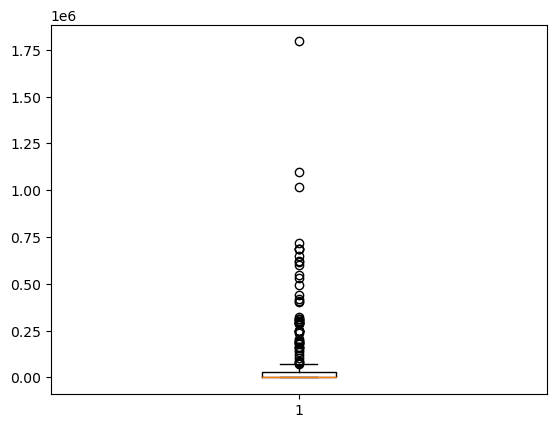

In [51]:
plt.boxplot(data['frete'])
plt.show()

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for a column
z_scores = zscore(data['frete'])

# Identify outliers based on a threshold
outlier_threshold = 3
outliers = data[abs(z_scores) > outlier_threshold]

print(outliers)
#create a list with outliers


## Tragets and Inputs Variables


In [75]:
#columns = year, month, frete, jobno

#forecasting for the next 3 months
forecast_dist = 3

# Input features (X)
input_indices=[0,1,3]
inputs = array_3d[:,:-forecast_dist,input_indices ] #last 'forecast_dist' months not included

# Target variable (y)
targets = array_3d[:,forecast_dist:,2]
targets= np.expand_dims(targets, axis= -1) #first 'forecast_dist' months not included

inputs.shape, targets.shape

((11, 57, 3), (11, 57, 1))

## Train-Test Split (scikit-learn library)

In [76]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=42) #42 assures the same split everytime

inputs_train.shape, targets_train.shape

((8, 57, 3), (8, 57, 1))

## Definir e treinar o modelo RNN (nao conluído)

In [ ]:
#Definir variáveis a mudar
timesteps = None
features = 4
units_RNN = 32

num_epochs = 10
batch_size = 32

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(units=units_RNN, input_shape=(timesteps, features), return_sequences=True)) #n sabemos quantos meses vai receber
#returnsequences faz reparar na sequencia

model.add(LSTM(units=units_RNN))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')
model.summary()


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_test, y_test))    

In [ ]:
loss = model.evaluate(X_test, y_test)